In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
dataset.shape
dataset.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

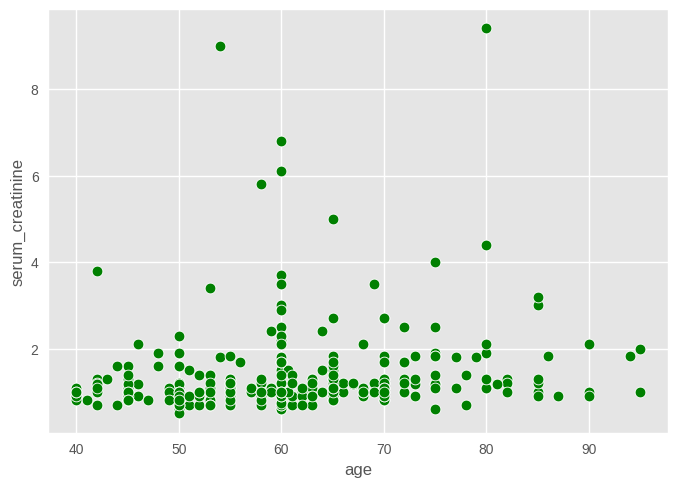

In [ ]:
sns.scatterplot(x='age', y='serum_creatinine', data=dataset, s=60, color='green')
plt.savefig('scatterplot.png', dpi=100)

In [ ]:
X = dataset[['age', 'serum_creatinine']].values

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=42)
model.fit(X)
centroids = model.cluster_centers_
centroids

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[84.25      ,  1.85857143],
       [47.61702128,  1.12021277],
       [60.48563793,  1.50422414],
       [71.1147541 ,  1.39245902]])

In [ ]:
model.labels_

array([3, 2, 2, 1, 2, 0, 3, 2, 2, 0, 3, 2, 1, 1, 1, 0, 0, 1, 3, 1, 2, 2,
       3, 1, 3, 0, 0, 3, 2, 0, 0, 0, 1, 1, 2, 3, 0, 0, 2, 2, 3, 1, 3, 3,
       2, 1, 1, 2, 0, 2, 3, 1, 2, 3, 2, 0, 3, 2, 1, 3, 1, 1, 2, 1, 1, 2,
       1, 3, 3, 2, 1, 2, 0, 2, 3, 2, 3, 1, 3, 2, 3, 3, 2, 0, 2, 1, 2, 2,
       1, 2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 0, 1, 2, 3, 2, 1, 2, 1,
       0, 2, 1, 3, 2, 2, 2, 0, 2, 0, 2, 3, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 0, 3, 2, 3, 2, 1, 0, 1, 1, 2, 3, 1, 1, 2, 3, 2, 3, 2, 1, 1,
       2, 2, 1, 1, 0, 2, 3, 1, 2, 1, 1, 0, 1, 2, 2, 3, 1, 1, 3, 1, 2, 2,
       3, 1, 2, 2, 1, 2, 2, 3, 2, 2, 1, 2, 2, 1, 0, 2, 1, 3, 1, 3, 1, 2,
       1, 2, 2, 1, 3, 2, 0, 1, 1, 0, 2, 1, 3, 1, 0, 1, 2, 3, 3, 2, 3, 2,
       3, 2, 1, 1, 2, 3, 2, 2, 2, 3, 2, 3, 1, 1, 1, 3, 3, 3, 2, 2, 3, 2,
       1, 3, 1, 2, 2, 2, 1, 1, 1, 2, 1, 3, 1, 1, 2, 2, 1, 1, 2, 2, 2, 3,
       2, 1, 2, 2, 1, 1, 1, 1, 3, 1, 2, 1, 3, 3, 1, 2, 3, 3, 1, 2, 1, 2,
       2, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1], dtyp

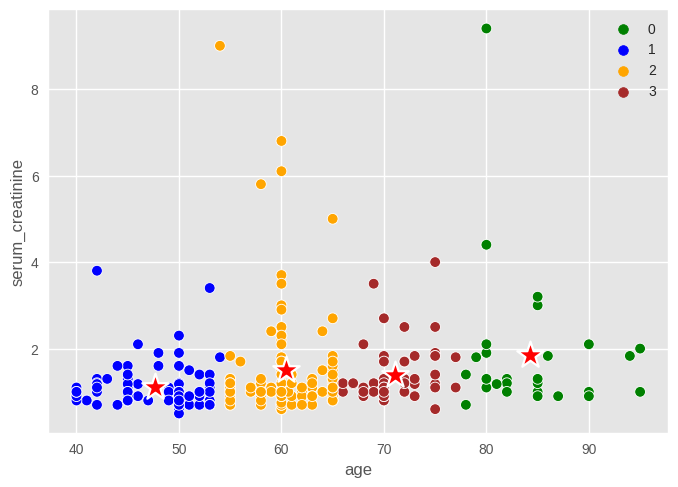

In [ ]:
sns.scatterplot(x='age', y='serum_creatinine', data=dataset, s=60, hue=model.labels_, palette=['green', 'blue', 'orange', 'brown'])

sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='*',
                s=400, color='red')

plt.savefig('clustering.png', dpi=100)

In [ ]:
model.inertia_

4232.615437983804

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

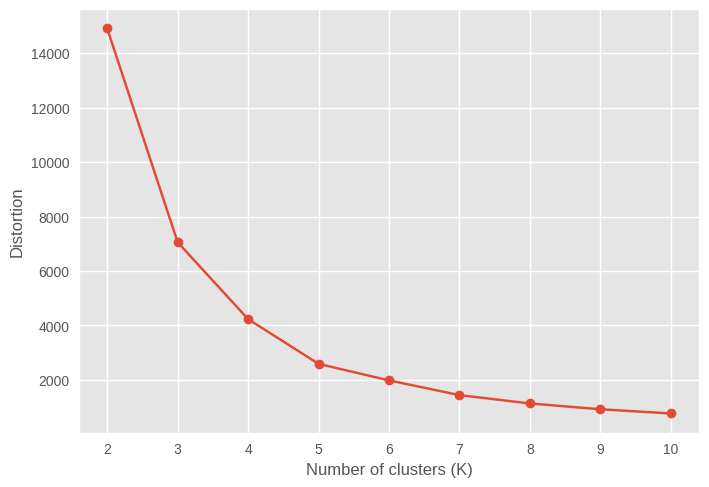

In [ ]:
distortions = []

for k in range(2, 11):
    KMeans_model = KMeans(n_clusters=k, random_state=42)
    KMeans_model.fit(X)
    distortions.append(KMeans_model.inertia_)

plt.plot(range(2, 11), distortions,  marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.savefig('elbow plot.png')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

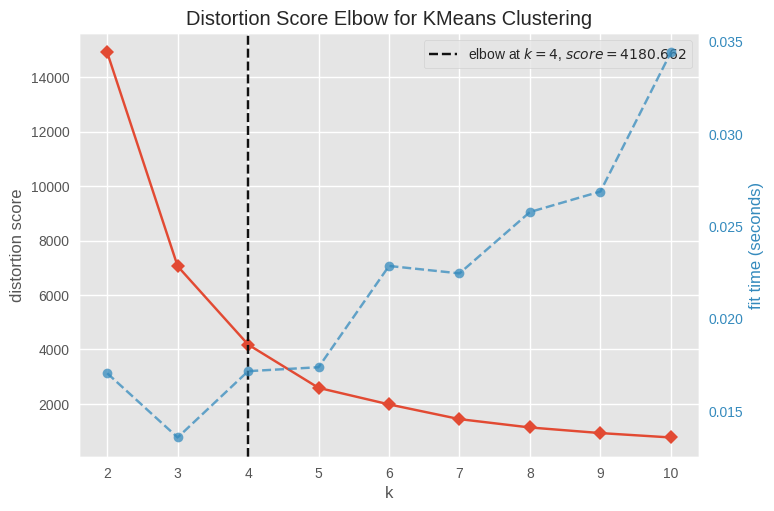

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

visualizer3 = KElbowVisualizer(KMeans(), k=(2,11))

visualizer3.fit(X) # Fit the data to the visualizer
visualizer3.show(outpath='elbowplot2.png')

In [ ]:

from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    model2 = KMeans(n_clusters=k, random_state=42)
    model2.fit(X)
    score = silhouette_score(X, model2.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k = {k} is {score:.4f}")


Silhouette Score for k = 2 is 0.5548
Silhouette Score for k = 3 is 0.5603
Silhouette Score for k = 4 is 0.5587
Silhouette Score for k = 5 is 0.5845
Silhouette Score for k = 6 is 0.5596
Silhouette Score for k = 7 is 0.5877
Silhouette Score for k = 8 is 0.5976
Silhouette Score for k = 9 is 0.5956
Silhouette Score for k = 10 is 0.6071


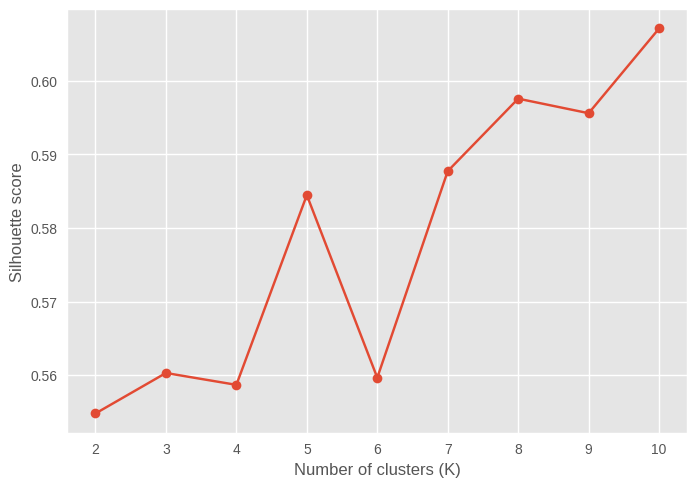

In [ ]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.savefig('silhouette plot.png')

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 299 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

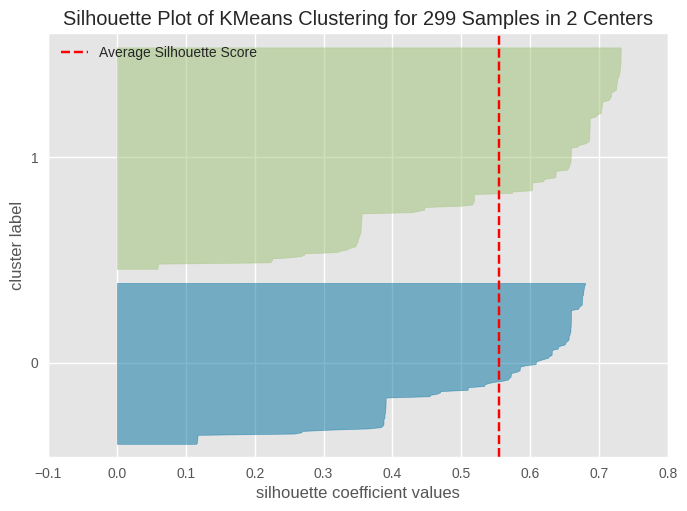

In [ ]:
model_k_2 = KMeans(n_clusters=2, random_state = 42)
visualizer_k_2 =  SilhouetteVisualizer(model_k_2, colors='yellowbrick')
visualizer_k_2.fit(X)
visualizer_k_2.show(outpath='silhouette_diagram_k_2.png')


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 299 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

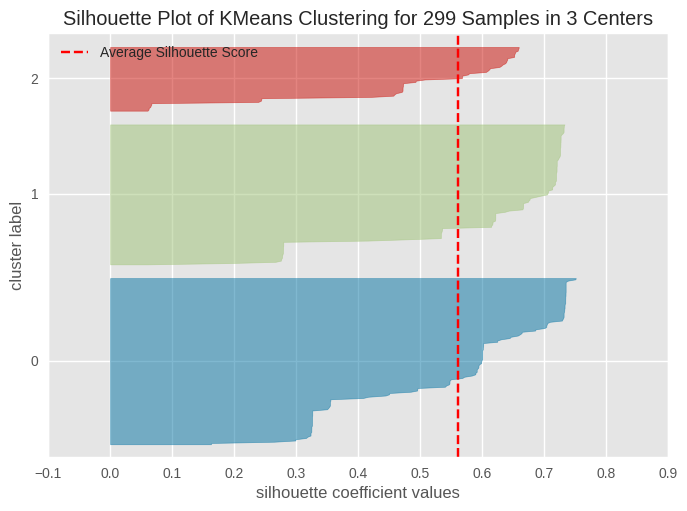

In [ ]:
model_k_3 = KMeans(n_clusters=3, random_state = 42)
visualizer_k_3 =  SilhouetteVisualizer(model_k_3, colors='yellowbrick')
visualizer_k_3.fit(X)
visualizer_k_3.show(outpath='silhouette_diagram_k_3.png')


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 299 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

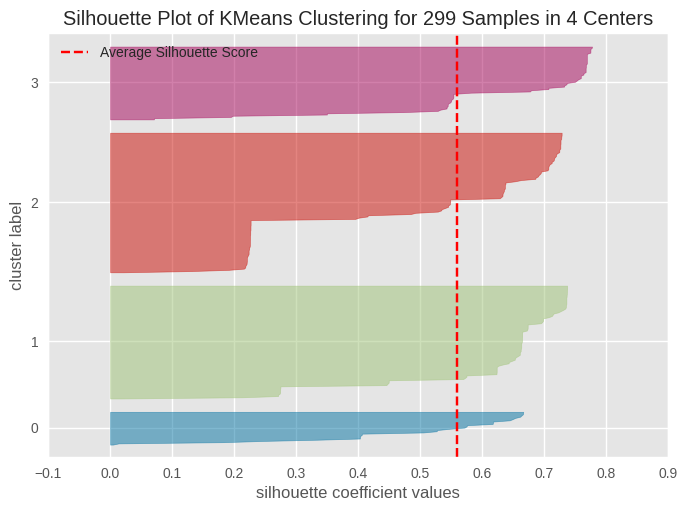

In [ ]:
model_k_4 = KMeans(n_clusters=4, random_state = 42)
visualizer_k_4 =  SilhouetteVisualizer(model_k_4, colors='yellowbrick')
visualizer_k_4.fit(X)
visualizer_k_4.show(outpath='silhouette_diagram_k_4.png')
